<a href="https://colab.research.google.com/github/KPabsy/mail-spam-classifier/blob/main/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import nltk

In [57]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df1=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [60]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df1.rename(columns={"v1":"type","v2":"text"},inplace=True)

In [62]:
df1.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
df1.groupby("type").describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [64]:
df=df1.drop_duplicates(keep='first').copy()

In [65]:
df.groupby("type").describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4516   4516                         Rofl. Its true to its name    1
spam   653    653  This is the 2nd time we have tried 2 contact u...    1

DATA Visualising

In [66]:
df['length']=df['text'].apply(len)

In [67]:
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

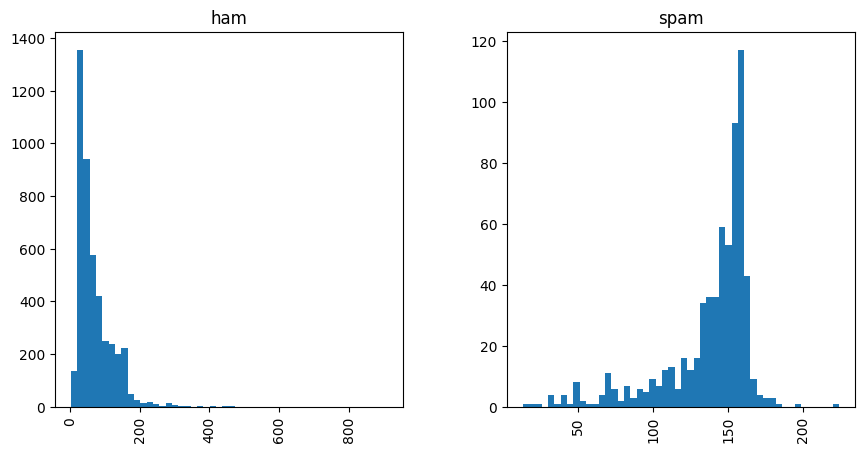

In [68]:
df.hist(column="length",by="type",bins=50,figsize=(10,5))

Preprocessing part


In [69]:
from nltk.stem import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab') # Added to resolve LookupError
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [70]:
import string

def clean_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)




In [71]:
df['sms_cleaned']=df['text'].apply(clean_text)

In [72]:
df.head()

,type,text,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


turning text into numbers

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tf_vec=TfidfVectorizer(max_features=3000)
x=tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [75]:
y=df['type'].values

Learning

In [76]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [77]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9806576402321083


In [79]:
import joblib

# This saves your trained Naive Bayes model and your TF-IDF settings
joblib.dump(model, 'spam_model.pkl')
joblib.dump(tf_vec, 'vectorizer.pkl')

['vectorizer.pkl']

In [85]:
# 1. Paste your email text here
raw_email = """
Subject: Dinner tonight?

Message: Hey, are we still on for dinner at 7 PM? I was thinking we could try that new pizza place downtown. Let me know if that works for you or if you'd rather just order in!"""

# 2. Preprocess the text using your existing function
cleaned_input = clean_text(raw_email)

# 3. Transform to numbers using your existing vectorizer
# Note: Always use .transform() for new data
vector_input = tf_vec.transform([cleaned_input]).toarray()

# 4. Predict
prediction = model.predict(vector_input)[0]

# 5. Output result
print("-" * 30)
print(f"PREDICTION: {prediction.upper()}")
print("-" * 30)

------------------------------
PREDICTION: HAM
------------------------------


In [88]:
# 1. Paste your email text here
raw_email = """Sign up for an Uber One membership to start saving!
Enjoy LKR 0 Delivery Fee on eligible orders, 5% Uber credit on eligible rides, and more. Members save LKR 1,279 per month on average.
Get 1 month free
Popular picks
Add more flavour to your day with a tasty takeaway
Browse restaurants
Tasty treats from local restaurants
4.5
spacer
spacer
Uber One Lock Icon	LKR 0 delivery fee
Matara Kesel Kole Bath Kade
$ • Sri Lankan
Order now
4.4
spacer
spacer
Uber One Lock Icon	LKR 0 delivery fee
Popeyes
$ • American • Burgers
Order now
4.8
spacer
spacer
Uber One Lock Icon	LKR 0 delivery fee
Paan Paan
$ • American • Bakery
Order now
4.6
spacer
spacer
Uber One Lock Icon	LKR 0 delivery fee
Royal Bakery
$ • Bakery • Desserts
Order now
Alt text

Fresh ingredients. At your fingertips.
Save time and make grocery shopping easier by getting your shopping list delivered.
Shop now

Benefits only available where Uber operates for eligible shops and rides marked with the Uber One icon. Other fees and taxes apply but do not count towards order minimums or Uber credit benefits. Minimum order may be required to receive waived Delivery Fee on standard delivery, and discounted Service Fee, from participating shops (if applicable in your country). Additional and optional fees may be charged for priority delivery and long-range delivery (if applicable in your country). Where applicable, Uber credit are earned after completion of eligible rides and expire on the dates stated in the Wallet section of your Uber app. Subject to change. Additional detail on Uber One benefits in your country are available here. Amount you could save based on average savings of members in your country from promos and member pricing.

View the Renewable Membership T&Cs.

Uber One is a subscription that auto-renews. Your payment method will be charged LKR 599/month or LKR 5,999/year, depending on the plan you select, upon the conclusion of any applicable free trial or promotional period. In order to ensure continuation of your subscription, you agree we may charge you up to one day before your auto-renewal date. If you cancel close to your renewal date, you may see a charge for the next cycle. This charge will be automatically refunded as long as you cancelled before the renewal date. Refunds may take a few days to appear, depending on your card provider. If you don't receive it, please contact support. Automatic refund is not yet available in all Uber One markets.

"""
# 2. Preprocess the text using your existing function
cleaned_input = clean_text(raw_email)

# 3. Transform to numbers using your existing vectorizer
# Note: Always use .transform() for new data
vector_input = tf_vec.transform([cleaned_input]).toarray()

# 4. Predict
prediction = model.predict(vector_input)[0]

# 5. Output result
print("-" * 30)
print(f"PREDICTION: {prediction.upper()}")
print("-" * 30)

------------------------------
PREDICTION: SPAM
------------------------------
